In [1]:
import os
import sys
import numpy as np

import umap.umap_ as umap

#add the parent folder to sys path so we can import from the notebook subfolder
sys.path.insert(0,'..')


BASEDIR = ""
TIFDIR = "/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/nf_demo"
#TIFDIR = "/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/NC_s4r2"
EXT='.tiff'

image_directory = os.path.join(BASEDIR, TIFDIR)
output_directory = os.path.join(image_directory, "outputs")

if not os.path.isdir(output_directory):
    os.mkdir(output_directory)
#image_directory = ALLDIR

In [2]:
%load_ext autoreload
%autoreload 2

import xfmreadout.processops as processops
import xfmreadout.clustering as clustering
import xfmreadout.visualisations as vis

FORCE_EMBED=True
FORCE_CLUST=True
OVERWRITE=True

elements, data, dims, sd_data, sd_dims = processops.compile(image_directory)

data, dims = processops.data_crop(data, dims, 100, 500, 150, 350)

#data, elements, dims, sd_data, sd_dims = processops.compile(image_directory)

-----------------
BEGIN reading processed data
Location: /home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/nf_demo
-----
Map files found: 20
Elements identified: ['Al', 'As', 'Ca', 'Cl', 'Compton', 'Cr', 'Cu', 'Fe', 'K', 'Mn', 'Mo', 'MoL', 'Ni', 'P', 'S', 'Si', 'Ti', 'V', 'Zn', 'sum']
-----------------
READING MAP DATA
Initial shape: (393, 700, 20)
Revised shape: (392, 700, 20)
-----
-----------------
READING VARIANCE DATA
Initial shape: (197, 350, 20)
-----
Al -- data: 0.054427698254585266, var: 1.4911073446273804, ratio: 54.79222500472953
As -- data: 0.0013860455946996808, var: 0.011784680187702179, ratio: 17.00475111752093
Ca -- data: 0.0773456022143364, var: 0.055722881108522415, ratio: 1.4408803994855677
Cl -- data: 0.003481516381725669, var: 0.12431034445762634, ratio: 71.41160967107669
Compton -- data: 5.356117216415157e-10, var: 1.7024261111941996e-08, ratio: 63.56941203514703
Cr -- data: 0.00429584551602602, var: 0.03232191130518913, ratio: 15.047985866628338
Cu -- data: 0

(80000,)
ELEMENT MAP: Si
Si, max: 3.98, 98: 3.52, avg: 0.70


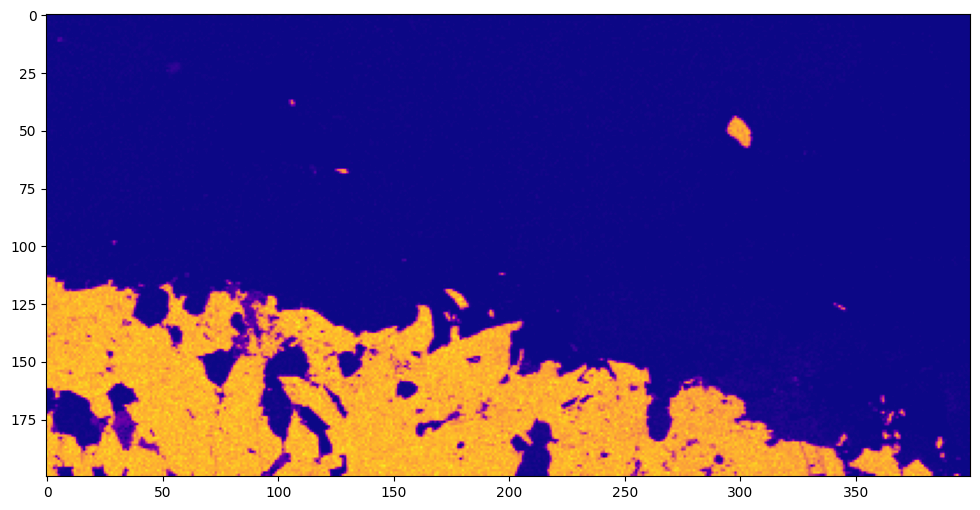

(68950,)
ELEMENT MAP: Si
Si, max: 3.58, 98: 3.47, avg: 0.98


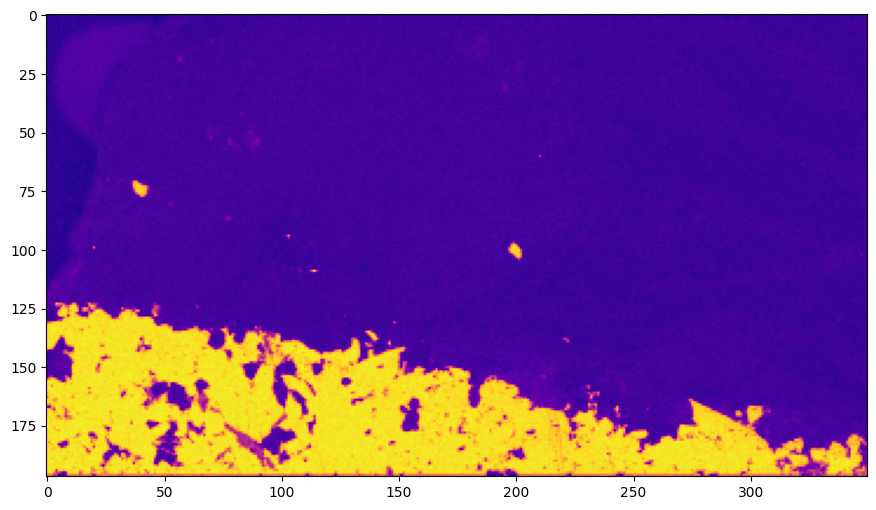

In [3]:
ELEMENT = "Si"

vis.show_map(data, dims, elements, ELEMENT)

vis.show_map(sd_data, sd_dims, elements, ELEMENT)

In [4]:
%%time

categories, classavg, embedding, clusttimes, classifier = clustering.run(data, image_directory, sqrt=True, force_embed=FORCE_EMBED, force_clust=FORCE_CLUST, overwrite=OVERWRITE)

#palette = vis.plot_clusters(categories, classavg, embedding, dims, output_directory=output_directory)

for i in range(len(elements)):
    print(f"{elements[i]}, max: {np.max(data[:,i]):.2f}, 98: {np.quantile(data[:,i],0.98):.2f}, avg: {np.average(data[:,i]):.2f}")





CALCULATING EMBED
running reducer: UMAP across data with shape: (80000, 20)
UMAP(n_components=3, n_neighbors=100, verbose=True)
Thu Jul  6 11:11:05 2023 Construct fuzzy simplicial set
Thu Jul  6 11:11:05 2023 Finding Nearest Neighbors
Thu Jul  6 11:11:05 2023 Building RP forest with 19 trees
Thu Jul  6 11:11:05 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Jul  6 11:11:38 2023 Finished Nearest Neighbor Search
Thu Jul  6 11:11:42 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Thu Jul  6 11:12:22 2023 Finished embedding
CALCULATING CATS
RUNNING CLASSIFIER
cluster -1, count: 21775
cluster 0, count: 8075
cluster 1, count: 4871
cluster 2, count: 4191
cluster 3, count: 3702
cluster 4, count: 4116
cluster 5, count: 8433
cluster 6, count: 4012
cluster 7, count: 4274
cluster 8, count: 8812
---------------------------
CLASSIFICATION COMPLETE
---------------------------
total time: 81.54 s
time per pixel: 0.001019 s
---------------------------
Al, max: 0.07, 98: 0.01, avg: 0.00
As, max: 0.00, 98: 0.00, avg: 0.00
Ca, max: 2.56, 98: 0.26, avg: 0.03
Cl, max: 0.00, 98: 0.00, avg: 0.00
Compton, max: 0.86, 98: 0.07, avg: 0.01
Cr, max: 0.00, 98: 0.00, avg: 0.00
Cu, max: 1.04, 98: 0.97, avg: 0.22
Fe, max: 3.34, 98: 3.13, avg: 2.00
K, max: 0.02, 98: 0.00, avg: 0.00
Mn, max: 0.26, 98: 0.02, avg: 0.01
Mo, max: 0.22, 98: 0.12, avg: 0.04
MoL, max: 0.03, 98: 0.00, avg: 0.00
Ni, max: 0.00, 98: 0.00, avg: 0.00
P, max: 0.00, 98: 0.00, avg: 0.00
S, max: 1.08, 98: 0.89, avg: 0.46
Si, m

In [11]:
range(embedding.shape[1])

ncats, cat_list = clustering.count_categories(categories)

centroids=np.zeros((ncats, embedding.shape[1]), dtype=np.float32)

print(centroids)

for i in cat_list:
     centroids[i] = clustering.get_centroid(embedding[categories==i])


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
-1 (21775, 3)
0 (8075, 3)
1 (4871, 3)
2 (4191, 3)
3 (3702, 3)
4 (4116, 3)
5 (8433, 3)
6 (4012, 3)
7 (4274, 3)
8 (8812, 3)


dtype('float32')

In [22]:
import xfmreadout.utils as utils
import matplotlib.pyplot as plt

maps = utils.map_roll(embedding, dims)

maps.shape

(80000, 3)


(200, 400, 3)

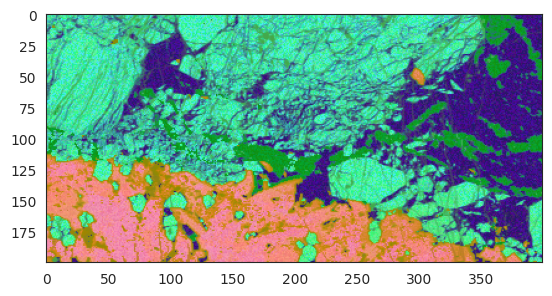

In [23]:
import xfmreadout.visualisations as vis

r = maps[:,:,0]
g = maps[:,:,1]
b = maps[:,:,2]

vis.tricolour(r, g, b)

#new = data[:,10]


In [14]:
elements[14]

'S'

(80000,)
(80000,)
(80000,)
(80000,)


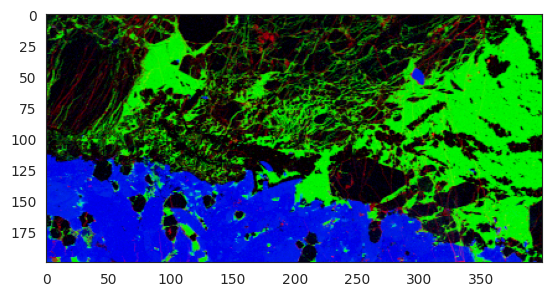

In [25]:
import xfmreadout.utils as utils
import xfmreadout.visualisations as vis

r = utils.get_map(data, dims, elements, 'Fe')
plt.imshow(r)

#vis.tricolour_enames('Fe','Cu','Si', data, dims, elements)
vis.tricolour_enames('Ca','Cu','Si', data, dims, elements)

/home/lachlan/CODEBASE/ReadoutXFM/notebooks/../xfmreadout/visualisations.py:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


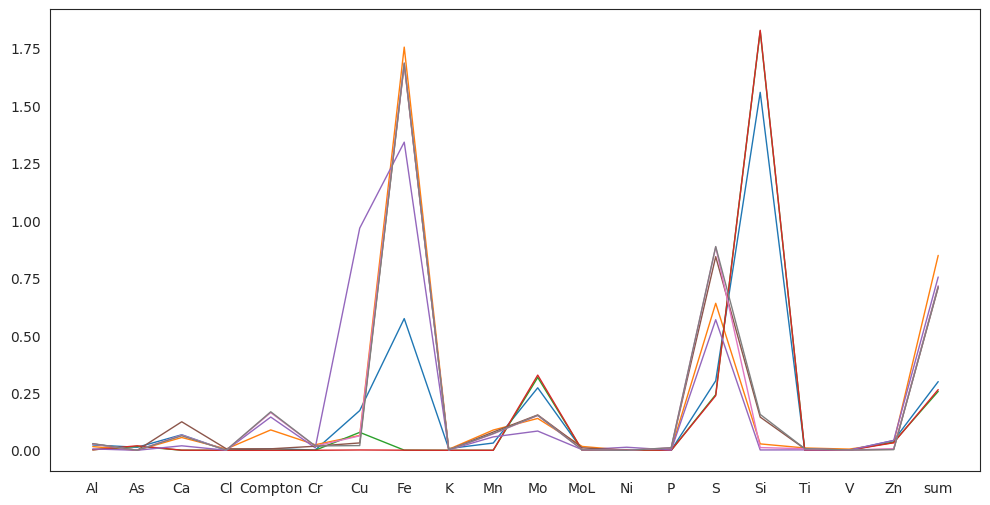

In [24]:
vis.category_avgs(categories, elements, classavg, palette=palette)